In [8]:
# Prepared for the BU RISE Practicum in Computational Neuroscience 2022
# Adapted to python programming langague, directly from:
# "An Introductory Course in Computational Neuroscience"
# by Paul Miller, Brandeis University 2017

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Write the values for simulation parameters

We will simulate an LIF neuron for 0.5 seconds with a time step of 0.1 millisecond. We create a time vector for the simualtion that covers the time interval from 0 to 0.5 seconds in steps of 0.1 ms. Make sure to keep track of your units.

We create a current stimulation vector that is the same size as our time vector, this will be the input to the LIF neuron at each time step. We want to give a rectangular stimulation pulse to the LIF neuron. Create the stimulation vector such that the stimulation level will start at zero, and then rise to a value of 0.21nA between 0.15 and 0.35 seconds, and return to zero. 

**We have done this for you in the code below**

In [10]:
# simulation parameters
tmax = 0.5                      # total seconds of simulation time
dt = 0.0001                     # time-step in seconds

# range() wont work for us here becasue our dt is a 'float'
# so we use np.arange which supports our data type
t_vector = np.arange(0,tmax,dt) # vector of time-points
ton = 0.15                      # time to begin applied current (onset)
toff = 0.35                     # time to end applied current (offset)
ind_on = round(ton/dt)          # time-point index of current onset sicne it isnt exact
ind_off = round(toff/dt)        # time-point index of current off sicne it isnt exact

I = np.zeros(len(t_vector))     # initializing a vector for applied current at each time-point
Iapp = 210e-12                  # magnitude of applied current step in Amps
I[ind_on:ind_off] = Iapp        # add the applied current for the trial

# Write the parameters for the LIF neuron

Now lets write the values for parameters of the LIF neuron itself. We will use a membrane time constant of tau = 10ms, a membrane capacitance of 100 pF, a resting membrane potential El = -70mV, and a threshold potential of Vth = -50mV. After a spike, the cell reset potential should be Vr = -80mV. The membrane conductance is simply Gl = Cm/tau. 

In [11]:
# Parameters for the LIF neuron
tau = 0.010                # membrane time constant
E_L = -0.070               # leak potential (also resting potential)
Vth = -0.050               # threshold potential (to produce spike)
Vreset = -0.080            # reset potential (post-spike)
Cm = 100e-12               # total membrane capacitance
G_L = Cm/tau               # total membrane conductance (leak conductance)

# Set up for simulating LIF neuron using a for loop

Create a vector for membrane potentials that is the same length as our time vector for the simulation. We want at least the first value of this vector to be the resting membrane potential, which in the LIF neuron is just the leak potential, since there are no other membrane currents. When we write our for loop, we will use this first value of the membrane voltage as our initial condition, and iterate the solution from there. 

We are also intersted in keeping track of when the neuron fires in time, so we will set up a spikes vector that is the same length as the time vector of our simulation. The values of this vector will be 0 when the neuon is not spiking, and 1 when the neuron spikes. 

In [12]:
# setting up for simulation:
V = E_L*np.ones(len(t_vector))        # initialize the membrane potential vector
spikes = np.zeros(len(t_vector))      # initialize a vector to record spikes

# Integrate using forward Euler using a for loop

Recall that we can get a very good estimate of the solution to our differntial equation by solving numerically using Euler's formula. To do this, we iterate through the time vector using a for loop. In each iteration, we will find the instantaneous gradient of the function. To do this, we calculate the estimate of the right hand side of the membrane voltage equation, using the voltage at the previous time, and we multiply that by the time step (dt), and add it to the value of the voltage at our previous time step.

Formula:
X(t) = X(t-1) + f(X(t-1),t(t-1))*dt

Since this simple neuron only has one channel, the leak channel, it cannot return to the resting membrane current once the cell fires. Tehrefor we have to explicitly reset the membrane potential ourselves. Code a statement that returns the membrane voltage to the reset potnetial Vr if a spike occurs. Record when a spike occured using the spikes vector we created earlier. Remember that a value of 0 means a spike did not occur on this time point, and a value of 1 caotures a spike at that time point.

In [13]:
# write a for loop through all time points in t_vector
        # Calculate Forward Euler method to update membrane potential
        # Use 'V' created above
        # if potential is above threshold
                # record the spike at that time-point
                #use 'spikes' vector created above
                 # reset the potential

for i in range(1, len(t_vector)):
    V[i] = V[i-1] + (dt/Cm) * (-G_L * (V[i-1] - E_L) + I[i-1])
    if V[i] >= Vth:
        spikes[i] = 1
        V[i] = Vreset                

# Visualizing our simulation results

Use matplotlib to create visualize the membrane voltage of the cell over time. What do you observe if you increase or decrease the applied current amplitude? Try giving the cell 0.18nA or 0.24nA and note the results. How many total spikes were fired? Does this match your plot? If not, why?

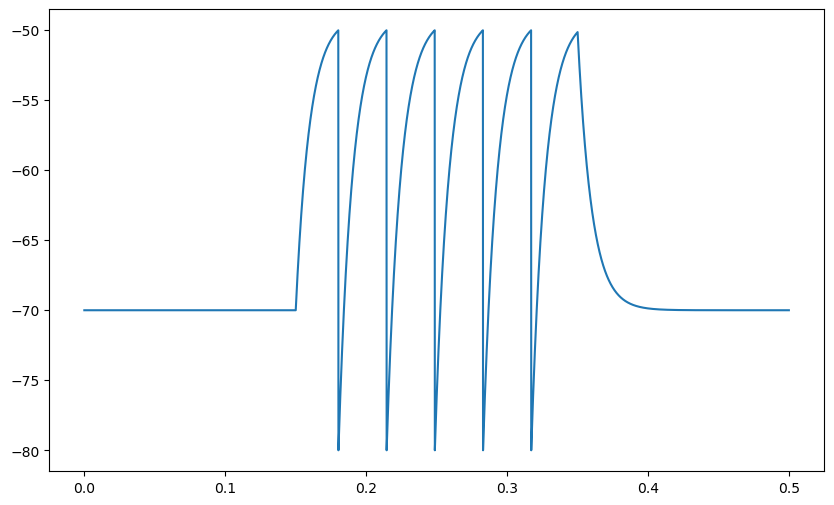

In [ ]:
# use matplotlib as plt.plot()
plt.figure(figsize=(10, 6))
plt.plot(t_vector, V*1000, label='210 pA')
plt.show()